# Lab: Linear Regression

**Objective**

The ISLR2 library contains the Boston data set, which records medv (median house value) for 506 census tracts in Boston. We will seek to predict
medv using 12 predictors such as rm (average number of rooms per house),
age (average age of houses), and lstat (percent of households with low
socioeconomic status).

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import t
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

In [178]:
# Boston census dataset
df_boston = pd.read_csv("/home/ehmtang/projects/ISLR-2ndEd-python/Notebooks/Datasets/Boston.csv")

In [179]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [180]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [181]:
# Simple Linear Regression Model

reg = LinearRegression()                            # Note: Equivalent to R's lm.fit()

# Prepare data
X = np.array(df_boston['lstat']).reshape(-1,1)      # feature, requires reshaping in order to be applied to the linear regression model
y = np.array(df_boston['medv'])                     # target 

# Applying linear regression on medv vs lstat
reg.fit(X, y)

print(f"Linear regression coefficicent: {reg.coef_}")
print(f"Linear regression coefficicent: {reg.intercept_}")


Linear regression coefficicent: [-0.95004935]
Linear regression coefficicent: 34.55384087938311


In [182]:
# Statistical Summary
# See Coefficient, Standard Error, t-value, P-value, Confidence Intervals
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           5.08e-88
Time:                        16:28:49   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [183]:
# prepare new data for prediction
X_new = sm.add_constant(np.array([5, 10, 15]).reshape(-1, 1)) # new values of the predictor variable, with a column of ones added for the intercept

# make predictions and print confidence intervals
preds = model.get_prediction(X_new)
print(preds.summary_frame(alpha=0.05))


        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  29.803594  0.405247      29.007412      30.599776     17.565675   
1  25.053347  0.294814      24.474132      25.632563     12.827626   
2  20.303101  0.290893      19.731588      20.874613      8.077742   

   obs_ci_upper  
0     42.041513  
1     37.279068  
2     32.528459  


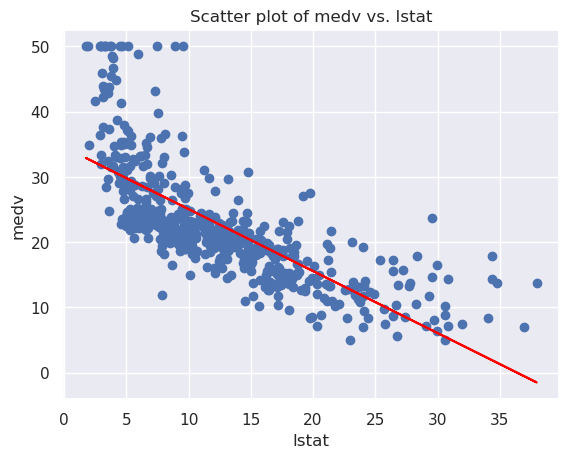

In [184]:
# create scatter plot
plt.scatter(X[:,1], y)

# add line of best fit
y_pred = model.predict(X)                   # Predicing y values from linear regression model
plt.plot(X[:,1], y_pred, color = 'red')

# add axis labels and title
plt.xlabel('lstat')
plt.ylabel('medv')
plt.title('Scatter plot of medv vs. lstat')

# show plot
plt.show()


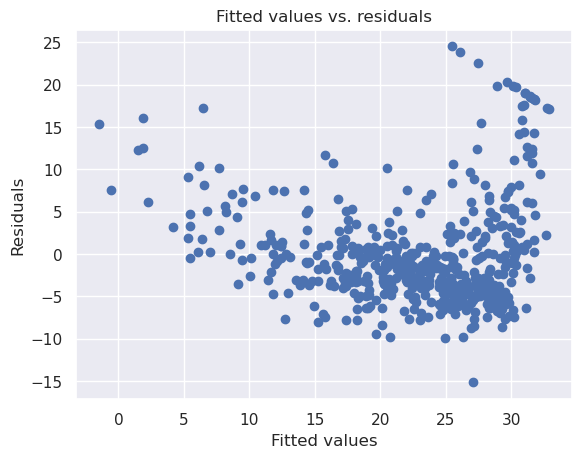

In [185]:
# create scatter plot of fitted values vs. residuals
residuals = y - y_pred              # ie the difference between true y and predicted y
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. residuals')

# show plot
plt.show()

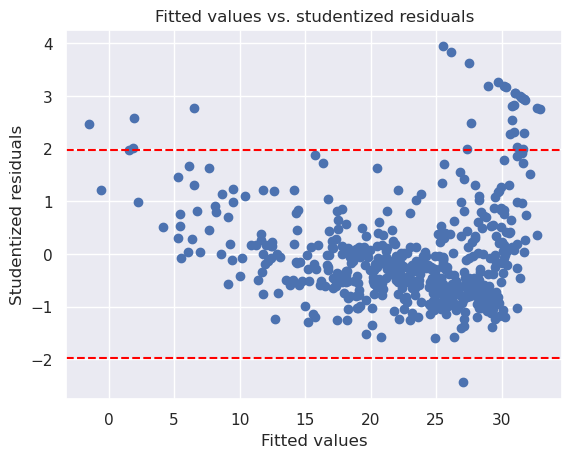

In [186]:
# create scatter plot of fitted values vs. studentized residuals
p = X.shape[1]  # number of predictor variables
n = X.shape[0]  # number of observations
df = n - p - 1  # degrees of freedom

"""
Studentized residuals are used to identify influential observations in the data,
which are observations that have a large impact on the estimated regression 
coefficients. An influential observation can have a large leverage value, which 
means it has a large influence on the fitted values, or it can have a large 
residual value, which means it is far away from the regression line. 

A high studentized residual value indicates that the observed response value for 
that observation is far away from what would be expected based on the model, 
given the influence of that observation on the model.

Studentized residuals are sometimes compared to a standard normal distribution, 
with a mean of 0 and a standard deviation of 1, to identify outliers in the data.
"""
studentized_residuals = residuals / np.sqrt(np.sum(residuals**2) / df)

# 97.5th percentile of t-distribution with df degrees of freedom
t_crit = t.ppf(0.975, df)  

plt.scatter(y_pred, studentized_residuals)
plt.axhline(y = t_crit, color='red', linestyle='dashed')
plt.axhline(y = -t_crit, color='red', linestyle='dashed')
plt.xlabel('Fitted values')
plt.ylabel('Studentized residuals')
plt.title('Fitted values vs. studentized residuals')

# show plot
plt.show()

Observation 374, max leverage: 0.0268651665102835
Mean leverage: 0.003952569169960475


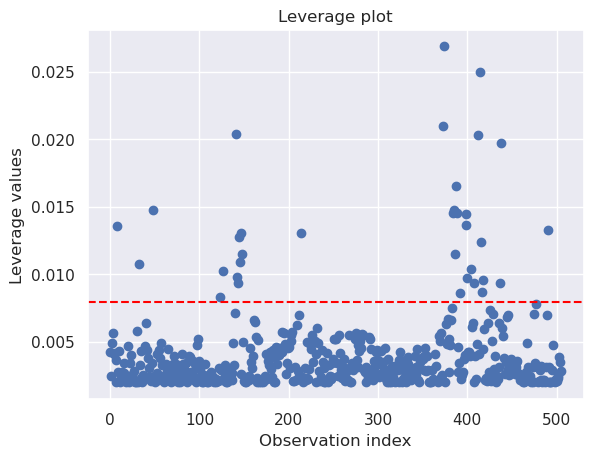

In [187]:
# calculate leverage values using statsmodels OLSInfluence class

"""
Leverage values, also known as leverage scores, are a measure of how influential
an observation is in determining the estimated regression coefficients in linear
regression analysis.

Observations with high leverage values should be investigated further to
determine whether they are legitimate data points or outliers that should be 
removed from the analysis (prediction model).

A common rule of thumb is that a leverage value greater than 2 times the average
leverage value of the dataset may be considered high.
"""
influence = OLSInfluence(model)
hat_values = influence.hat_matrix_diag

# find observation with maximum leverage
max_leverage_idx = np.argmax(hat_values)
max_leverage = np.max(hat_values)
mean_leverage = np.mean(hat_values)
print(f"Observation {max_leverage_idx}, max leverage: {max_leverage}")
print(f"Mean leverage: {mean_leverage}")

# create leverage plot
plt.scatter(np.arange(len(hat_values)), hat_values)
plt.axhline(y = 2 * mean_leverage, color='red', linestyle='dashed')
plt.xlabel('Observation index')
plt.ylabel('Leverage values')
plt.title('Leverage plot')

# show plot
plt.show()

In [188]:
# Multiple Regression Model

reg = LinearRegression()

# Prepare data
X = df_boston.drop(['medv'], axis = 1)      # features
y = df_boston['medv']                       # target

reg = LinearRegression().fit(X, y)

# Applying linear regression on medv vs lstat and age
reg.fit(X, y)

print(f"Linear regression coefficicent: {reg.coef_}")
print(f"Linear regression coefficicent: {reg.intercept_}")

Linear regression coefficicent: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Linear regression coefficicent: 36.45948838509015


In [189]:
# Statistical Summary, for all features
# See Coefficient, Standard Error, t-value, P-value, Confidence Intervals
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          6.72e-135
Time:                        16:28:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [190]:
# Variance Inflation Factor
"""
A variance inflation factor (VIF) provides a measure of multicollinearity 
among the independent variables in a multiple regression model.

Detecting multicollinearity is important because while multicollinearity does 
not reduce the explanatory power of the model, it does reduce the statistical 
significance of the independent variables. 

A large VIF on an independent variable indicates a highly collinear relationship 
to the other variables that should be considered or adjusted for in the structure 
of the model and selection of independent variables.
"""
# Calculate VIF for each feature
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Print VIFs
for i in range(len(vif)):
    print(df_boston.columns[i], ':', vif[i])

crim : 585.2652379423121
zn : 1.7921915474332413
indus : 2.2987581787494418
chas : 3.9915964183460315
nox : 1.0739953275537883
rm : 4.393719847577493
age : 1.9337444357832565
dis : 3.1008255128153372
rad : 3.9559449063727263
tax : 7.484496335274472
ptratio : 9.00855394759707
black : 1.7990840492488989
lstat : 1.3485210764063753
medv : 2.9414910780919366
